<a href="https://colab.research.google.com/github/mahfuz978/TECH-I.S.---Model-Optimization/blob/main/Feature_Selection/Mahfuzur_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/Tech-i-s/techis-ds-wiki/master/Step%204-1%20Model%20Optimisation/01_Feature%20Selection/data/house_prices_multivariate.csv?token=AM2M2N6MS7HSUA3C4BEOHNTAKAPQ4'

In [ ]:
df = pd.read_csv(url)
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,2008,250000


In [ ]:
def plot_corr(data, size = 11):
  corr = data.corr()
  fig, ax = plt.subplots(figsize = (size, size))
  plt.set_cmap('YlOrRd')
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns, rotation = 90)
  plt.yticks(range(len(corr.columns)), corr.columns)
  return ax

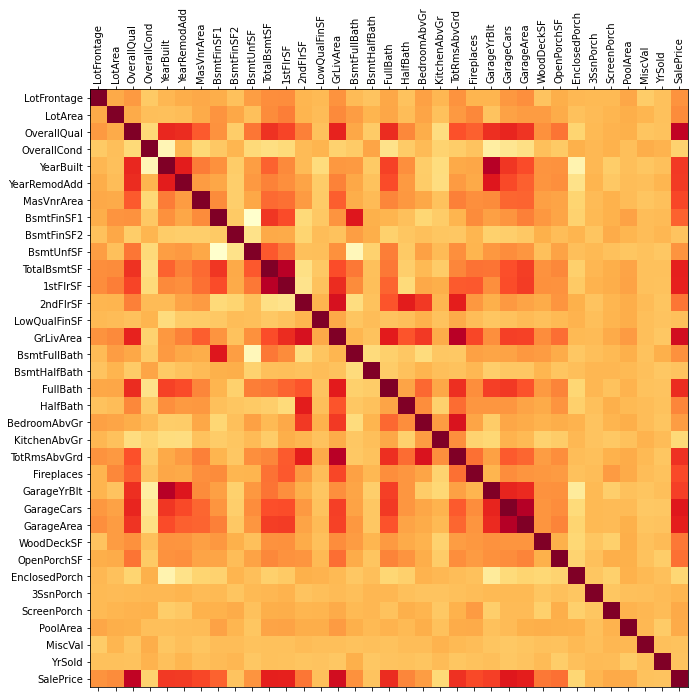

In [ ]:
plot_corr(df);

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

In [ ]:
def percentile_k_features(df, k=20):
  x = df.iloc[:,:-1]
  y = df.loc[:, 'SalePrice']
  features = x.columns
  sp = SelectPercentile(f_regression, percentile=k)
  sp.fit_transform(x, y)
  imp_features = [features[i] for i in np.argsort(sp.scores_)[::-1]]
  return imp_features[:7]

In [ ]:
percentile_k_features(df)

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath']